<a href="https://colab.research.google.com/github/C3578/review_pandas/blob/master/review_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Библиотека pandas также может извлекать данные из веб-страниц.

Извлечём таблицу с индексом деловой активности в производственном секторе США с портала mfd.ru.

Индекс деловой активности менеджеров по снабжению в производственном секторе США, рассчитываемый Институтом управления поставками (ISM). Отражает состояние деловой активности в обрабатывающей промышленности страны. Показатель базируется на основе опроса управляющих закупками и поставками 400 компаний из 20 секторов промышленности различных регионов страны, публикуется 1 раз в месяц и в дальнейшем не пересматривается. Равновесным уровнем для этого показателя выступает 50 пунктов – если индекс выше 50 пунктов, в промышленности происходит расширение деловой активности. Индекс состоит из следующих компонент: индекс новых заказов, производства, занятости, отгрузок, запасов поставщиков, запасов клиентов, цен, невыполненных заказов, новых экспортных заказов, импорта (mfd.ru.).

In [ ]:
import pandas as pd

In [ ]:
tables = pd.read_html("https://mfd.ru/calendar/details/?id=20")

In [ ]:
len(tables)

2

In [ ]:
# Pandas извлекла список из 2 таблиц, нам интересна вторая таблица.
tables[1]

,Время (мск),Период,Значение,Прогноз,Предыдущее,Пересм. с
0,"01.07.2020, 17:00",июнь,52.6,49.5,43.1,NaN
1,"01.06.2020, 17:00",май,43.1,43.5,41.5,NaN
2,"01.05.2020, 17:00",апрель,41.5,36.7,49.1,NaN
3,"01.04.2020, 17:00",март,49.1,44.9,50.1,NaN
4,"02.03.2020, 18:00",февраль,50.1,50.5,50.9,NaN
...,...,...,...,...,...,...
157,"02.04.2007, 18:00",март,50.9,51.3,52.3,NaN
158,"01.03.2007, 18:00",февраль,52.3,50.0,49.3,NaN
159,"01.02.2007, 18:00",январь,49.3,51.6,51.4,NaN
160,"03.01.2007, 18:00",декабрь,51.4,51.0,49.5,NaN


In [ ]:
df = tables[1]

In [ ]:
df = df.drop([161])     #  Удалим 161 строку

In [ ]:
df.describe()

,Время (мск),Период,Значение,Прогноз,Предыдущее,Пересм. с
count,161,161,161,160,160,4
unique,161,12,102,99,102,4
top,"01.08.2017, 17:00",февраль,50.9,54.2,53.5,50.7
freq,1,14,5,6,4,1


In [ ]:
# В столбце "Прогноз" отсутствует одно значение, заполним его.

In [ ]:
# Изменим тип данных иследуемых переменных на float.
df[['Значение', 'Прогноз']] = df[['Значение', 'Прогноз']].astype(float)

In [ ]:
# Заполним пропуски медианными значениями.
df[['Значение', 'Прогноз']] = df[['Значение', 'Прогноз']].fillna(df[['Значение', 'Прогноз']].median(axis=0), axis=0)

In [ ]:
df.describe()

,Значение,Прогноз
count,161.000000,161.000000
mean,52.809317,52.576398
std,5.307987,5.212947
min,32.400000,32.400000
25%,50.600000,50.500000
50%,53.100000,53.100000
75%,56.300000,56.100000
max,61.400000,61.100000


In [ ]:
import matplotlib.pyplot as plt

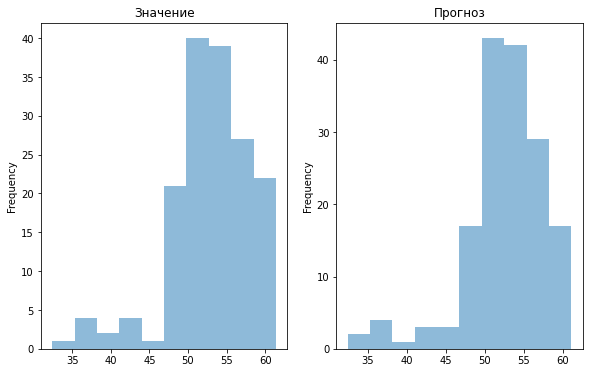

In [ ]:
# Гистограмма частот.

plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.title('Значение')
df['Значение'].plot.hist(alpha = 0.5)
plt.subplot(132)
plt.title('Прогноз')
df['Прогноз'].plot.hist(alpha = 0.5)
plt.show()

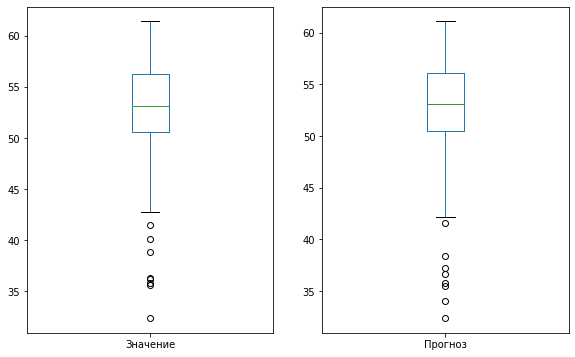

In [ ]:
# Box plot.
plt.figure(figsize=(15, 6))
plt.subplot(131)
df['Значение'].plot.box()
plt.subplot(132)
df['Прогноз'].plot.box()
plt.show()

In [ ]:
# Найдём среднее значение, 95%-доверительный интервал, стандартное отклонение по столбцу "Значение".

In [ ]:
import numpy as np
import scipy as sp
import scipy.stats

In [ ]:
# Для этого напишем функцию.
def func(data, confidence=0.95):
       a = 1.0 * np.array(data)
       n = len(a)
       mu, sigma = scipy.stats.norm.fit(data)
       SEM = sigma/np.sqrt(n - 1)
       h = 1.96 * SEM
       return mu, sigma, mu-h, mu+h

In [ ]:
# Найдем среднее и его доверительный 95% интервал.
values = func(df['Значение'])
print('Мат. ожидание:', values[0])
print('Стандартное отклонение:', values[1])
print('95%-доверительный интервал:', values[2:])

Мат. ожидание: 52.80931677018633
Стандартное отклонение: 5.291476812987994
95%-доверительный интервал: (51.98939394335079, 53.629239597021865)


In [ ]:
# Посмотрим на форму распределения по столбцам "Значение" и "Прогноз", для этого используем библиотеку seaborn.
import seaborn as sns

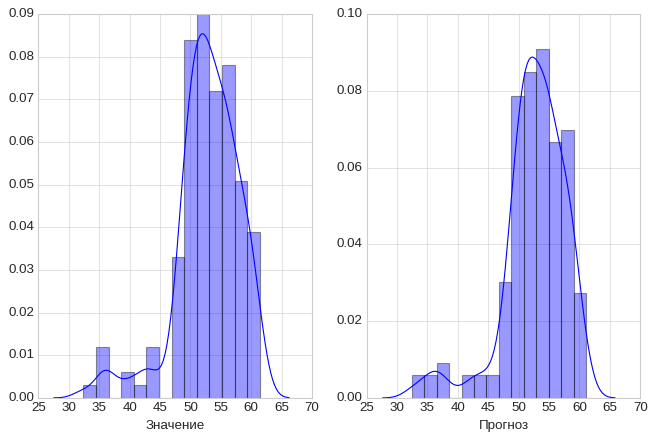

In [ ]:
plt.style.use('classic')
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(15, 6))
plt.subplot(131)
sns_plot = sns.distplot(df['Значение'])
fig = sns_plot.get_figure()
plt.subplot(132)
sns_plot = sns.distplot(df['Прогноз'])
fig = sns_plot.get_figure()
plt.show()

# Корреляция Пирсона. 



Корреляция Пирсона представляет собой меру зависимости переменных. Коэффициент корреляции Пирсона r называется также линейной корреляцией, т.к. измеряет степень линейных связей между переменными.При вычислении корреляции Пирсона предполагается, что переменные измерены, как минимум, в интервальной шкале. Некоторые другие коэффициенты корреляции могут быть вычислены для менее информативных шкал. Коэффициенты корреляции изменяются в пределах от -1.00 до +1.00. Обратите внимание на крайние значения коэффициента корреляции. Значение -1.00 означает, что переменные имеют строгую отрицательную корреляцию. Значение +1.00 означает, что переменные имеют строгую положительную корреляцию. Отметим, что значение 0.00 означает отсутствие корреляции. Корреляция Пирсона (далее называемая просто корреляцией) предполагает, что две рассматриваемые переменные измерены, по крайней мере, в интервальной шкале (см. Элементарные понятия статистики). Она определяет степень, с которой значения двух переменных "пропорциональны" друг другу.

In [ ]:
# Вычислим корреляцию Пирсона для столбцов "Значение" и "Прогноз".
r, p = scipy.stats.pearsonr(df['Значение'], df['Прогноз'])
print('Коэффициент корреляции:', r)
print('            Значимость:', p)

Коэффициент корреляции: 0.9385542414973725
            Значимость: 2.329912872357373e-75


Коэффициент корреляции представляет собой меру линейной зависимости двух переменных.
Значимость, вычисленная для каждой корреляции, представляет собой главный источник информации о надежности корреляции.Значимость коэффициента корреляции говорит нам о том значима ли эта взаимосвязь. Обычно во многих областях результат <=0.05 является приемлемой границей статистической значимости, однако следует помнить, что этот уровень все еще включает довольно большую вероятность ошибки (5%). Результаты, значимые на уровне p <= 0.01 обычно рассматриваются как статистически значимые, а результаты с уровнем p <= 0.005 или p <= 0.001 как высоко значимые. Однако следует понимать, что данная классификация уровней значимости достаточно произвольна и является всего лишь неформальным соглашением, принятым на основе практического опыта в той или иной области исследования.


Диаграмма рассеяния визуализирует зависимость между двумя переменными X и Y. Точки данных изображаются точками в двумерном пространстве, где оси соответствуют переменным. Две координаты (X и Y), которые определяют положение каждой точки, соответствуют значениям двух переменных для этой точки. Если две переменные сильно связаны, то множество точек данных принимает определенную форму (например, прямой линии или кривой). Если же переменные не связаны, то точки образуют "облако".

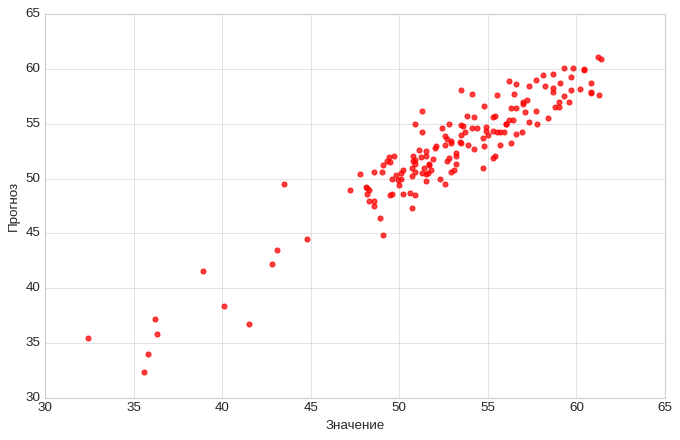

In [ ]:
# Построим диаграмму рассеяния.

plt.figure(figsize=(10, 6))
plt.scatter(df['Значение'], df['Прогноз'],alpha=0.75, color='red')
plt.xlabel('Значение')
plt.ylabel('Прогноз')
plt.show()

# Генерация псевдослучайных последовательностей.

Генераторы псевдослучайных последовательностей (PRNG) начинают со случайного числа, также известного как зерно (seed) и затем используют алгоритм для генерации псевдослучайной последовательности битов, основанных на нём.

In [ ]:
import random

In [ ]:
# Если вы хотите чтобы эксперемент был повторяемый, то нужно зафиксировать первичное зерно random.
random.seed(224)

In [ ]:
random.seed(224)
random.random()     #  Возвращает случайное десятичное число с интервалом [0.0, 1.0].

0.06378348055453587

In [ ]:
#  Если повторить вызов случайного числа, то его значение не изменится т.к. 
#  значение seed зафиксировано и результат воспроизводим.
random.seed(224)
random.random()  

0.06378348055453587

In [ ]:
# Но повторно вызванное случайное значение уже изменится.
random.random()

0.19003145742968008

In [ ]:
random.randint(0, 100)      #  Вернёт случайно целое число от 0 до 100.


9

In [ ]:
random.uniform(500, 600)      #  Вернёт случайно десятичное число из указанного диапазона.

599.1692271345975

In [ ]:
names = ['Anna', 'Ivan', 'Denis', 'Elena', 'Olga', 'Bob']

In [ ]:
random.choice(names)      #  Вернёт случайно выбранный элемент из последовательности.

'Ivan'

In [ ]:
random.choices(names, k=3)      #  Вернёт случайно выбранные элементы (k) из последовательности.

['Anna', 'Bob', 'Elena']

In [ ]:
names

['Anna', 'Ivan', 'Denis', 'Elena', 'Olga', 'Bob']

In [ ]:
random.shuffle(names)      #  Перемешивает на месте выбранные элементы.

In [ ]:
names

['Elena', 'Olga', 'Bob', 'Denis', 'Anna', 'Ivan']

In [ ]:
# Если нужно создать список из случайных значений, для этого подойдет генератор списков.
[random.random() for _ in range(5)]

[0.10404329096978449,
 0.822542136701891,
 0.4180067474370368,
 0.3529141187303778,
 0.42046346340322427]

In [ ]:
import numpy as np

In [ ]:
# Создадим массив случайных чисел, имеющих нормальное распределение.
np.random.randn(5)

array([-0.55531725, -0.6245949 ,  0.99742741,  1.90166907, -1.03075175])

In [ ]:
np.random.randn(5, 5)

array([[-0.80403971, -1.02405998, -0.22487247,  0.68994896,  1.78945855],
       [ 1.717678  , -0.52712632,  0.48241632, -1.2122666 , -0.3682315 ],
       [-1.27733517,  1.10711448,  0.23120693,  0.01627591,  1.99076641],
       [-1.0644457 ,  0.57862756, -0.86410352, -1.27065667,  1.1372002 ],
       [ 1.01726761, -0.41642402,  0.55094113,  0.51748731,  1.30958714]])

In [ ]:
# Создадим массив случайных целых чисел от 0 до 1000.
np.random.randint(1000, size=(5, 5))

array([[175, 199, 722,  44, 148],
       [545, 366, 109, 112, 277],
       [219, 473, 646,   8, 282],
       [392, 875,  90, 625, 365],
       [868, 918, 495, 521, 829]])

# Вычисление описательных статистик, вычисление корреляций Пирсона.

In [ ]:
# Создадим массив случайных чисел, имеющих нормальное распределение.
mu, sigma = 0, 1
x_normal =np.random.normal(mu, sigma, 10000)
print(max(x_normal), min(x_normal), len(x_normal))

3.647773260786536 -3.5385817798217976 10000


In [ ]:
# Создадим массив случайных чисел, имеющих равномерное распределение.
x_1 = [random.uniform(-4, 4) for _ in range(10000)]
print(max(x_1), min(x_1), len(x_1))

3.9998772953404353 -3.998011450551811 10000


In [ ]:
import scipy.stats

In [ ]:
# Функция выводит на печать мат. ожидание, стандартное отклонение, 95%-доверительный интервал.
def func(data, confidence=0.95):
       a = 1.0 * np.array(data)
       n = len(a)
       mu, sigma = scipy.stats.norm.fit(data)
       SEM = sigma/np.sqrt(n - 1)
       h = 1.96 * SEM
       print('Мат. ожидание:', mu)
       print('Стандартное отклонение:', sigma)
       print('95%-доверительный интервал:', mu-h, mu+h)

In [ ]:
func(x_normal)

Мат. ожидание: 0.005185729633073777
Стандартное отклонение: 0.9868823355860257
95%-доверительный интервал: -0.014158131361643095 0.02452959062779065


In [ ]:
func(x_1)

Мат. ожидание: -0.03268907544757795
Стандартное отклонение: 2.3005935403190154
95%-доверительный интервал: -0.07778296358860788 0.012404812693451978


In [ ]:
import matplotlib.pyplot as plt

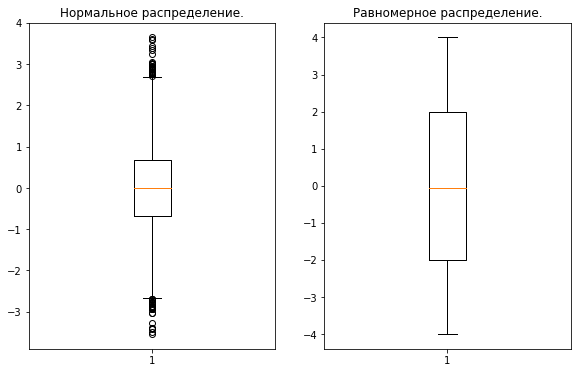

In [ ]:
# Построим boxplot.
plt.figure(figsize=(15, 6))
plt.subplot(131)
plt.title('Нормальное распределение.')
plt.boxplot(x_normal)
plt.subplot(132)
plt.title('Равномерное распределение.')
plt.boxplot(x_1)
plt.show()

In [ ]:
import seaborn as sns

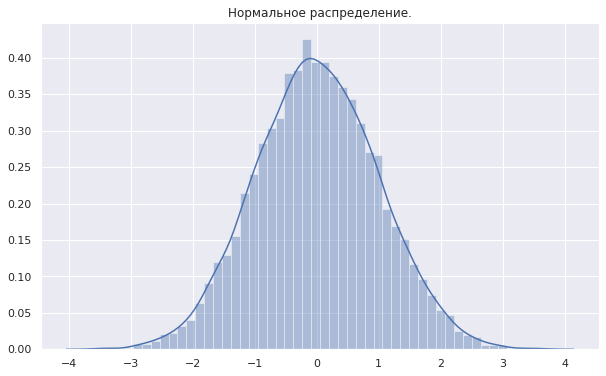

In [ ]:
# Посмотрим на форму распределения.
sns.set(rc={'figure.figsize':(10, 6)})
sns_plot = sns.distplot(x_normal).set_title('Нормальное распределение.')
fig = sns_plot.get_figure()

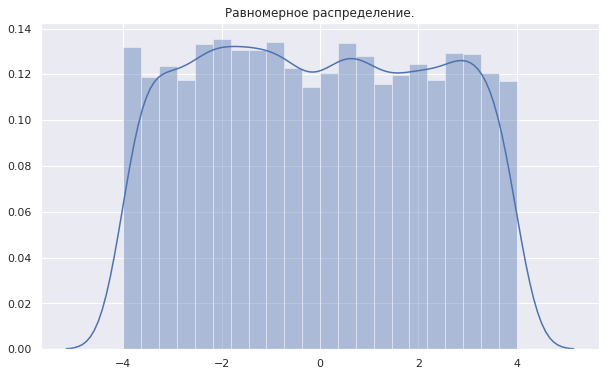

In [ ]:
# Посмотрим на форму распределения.
sns.set(rc={'figure.figsize':(10, 6)})
sns_plot = sns.distplot(x_1).set_title('Равномерное распределение.')
fig = sns_plot.get_figure()

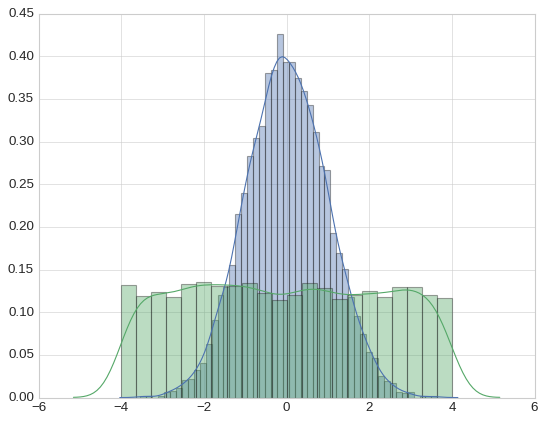

In [ ]:
plt.style.use('classic')
plt.style.use('seaborn-whitegrid')
sns.distplot(x_normal)
sns.distplot(x_1)
plt.show()

## Корреляция Пирсона

In [ ]:
from scipy import stats
import pandas as pd

In [ ]:
# Вычислим корреляцию Пирсона
stats.pearsonr(x_normal, x_1)

(-0.007934100777383025, 0.42758943788753934)

In [ ]:
# Создадим массив 10*10, нормальное распределение.
df = pd.DataFrame(np.random.randn(10, 10), columns=['a', 'b', 'c', 'd', 'e', 'f', 'g,', 'h', 'i', 'j'])

In [ ]:
# Создадим для массива корреляционную матрицу.
pearsoncorr = df.corr(method='pearson')

In [ ]:
pearsoncorr

,a,b,c,d,e,f,"g,",h,i,j
a,1.000000,0.672062,0.129146,0.063596,-0.301315,-0.221528,0.330058,-0.253143,0.273819,0.013891
b,0.672062,1.000000,0.129544,0.245650,-0.210858,-0.387781,-0.370306,-0.413309,0.513033,-0.192486
c,0.129146,0.129544,1.000000,-0.102194,-0.194439,0.170658,0.315545,-0.056580,-0.077942,0.227988
d,0.063596,0.245650,-0.102194,1.000000,0.097829,-0.277320,-0.417764,0.658957,-0.167002,0.482275
e,-0.301315,-0.210858,-0.194439,0.097829,1.000000,0.428188,-0.261676,0.010346,-0.156906,0.250772
f,-0.221528,-0.387781,0.170658,-0.277320,0.428188,1.000000,0.079845,0.066374,-0.033750,-0.037414
"g,",0.330058,-0.370306,0.315545,-0.417764,-0.261676,0.079845,1.000000,0.041696,-0.214430,0.137561
h,-0.253143,-0.413309,-0.056580,0.658957,0.010346,0.066374,0.041696,1.000000,-0.300187,0.621335
i,0.273819,0.513033,-0.077942,-0.167002,-0.156906,-0.033750,-0.214430,-0.300187,1.000000,-0.585846
j,0.013891,-0.192486,0.227988,0.482275,0.250772,-0.037414,0.137561,0.621335,-0.585846,1.000000


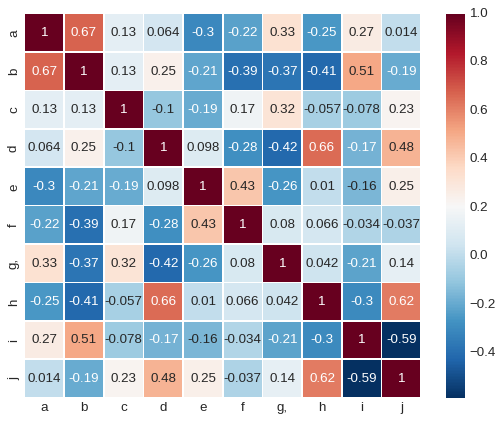

In [ ]:
# Посмотрим на данные по корреляции, используя цветовую карту.
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()